!conda install scikit-image
!conda install opencv
!pip install imutils

In [1]:
from skimage.metrics import structural_similarity

import cv2

import argparse
import imutils

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# load the two input images
imageA = cv2.imread("/Users/reejungkim/Documents/Git/Image classification/beyond_card.jpeg")
imageB = cv2.imread("/Users/reejungkim/Documents/Git/Image classification/beyond_master_card.jpeg")
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [3]:
display(imageA)
display(imageB)

array([[[236, 255, 255],
        [230, 250, 251],
        [244, 255, 255],
        ...,
        [255, 255, 252],
        [245, 246, 244],
        [251, 255, 255]],

       [[235, 253, 254],
        [243, 255, 255],
        [250, 255, 254],
        ...,
        [248, 243, 240],
        [255, 255, 254],
        [241, 246, 245]],

       [[250, 255, 255],
        [253, 255, 254],
        [240, 237, 233],
        ...,
        [255, 255, 252],
        [255, 254, 253],
        [246, 248, 248]],

       ...,

       [[236, 235, 237],
        [255, 255, 254],
        [255, 254, 251],
        ...,
        [255, 255, 252],
        [253, 254, 252],
        [247, 252, 251]],

       [[246, 255, 255],
        [251, 255, 255],
        [255, 254, 254],
        ...,
        [244, 241, 237],
        [253, 255, 254],
        [238, 244, 243]],

       [[240, 254, 255],
        [246, 255, 255],
        [248, 246, 246],
        ...,
        [255, 255, 252],
        [242, 247, 245],
        [248, 255, 255]]

array([[[232, 255, 255],
        [227, 249, 247],
        [243, 255, 254],
        ...,
        [255, 255, 252],
        [242, 247, 245],
        [248, 255, 255]],

       [[230, 251, 249],
        [241, 255, 255],
        [248, 255, 252],
        ...,
        [249, 246, 242],
        [253, 255, 254],
        [241, 247, 246]],

       [[248, 255, 254],
        [251, 255, 252],
        [243, 240, 235],
        ...,
        [255, 255, 252],
        [255, 255, 254],
        [245, 250, 249]],

       ...,

       [[251, 254, 255],
        [255, 254, 255],
        [255, 255, 251],
        ...,
        [255, 255, 252],
        [255, 255, 254],
        [249, 254, 253]],

       [[240, 251, 255],
        [246, 252, 255],
        [255, 255, 254],
        ...,
        [244, 241, 237],
        [253, 255, 254],
        [241, 247, 246]],

       [[234, 253, 255],
        [243, 255, 255],
        [250, 252, 252],
        ...,
        [255, 255, 252],
        [244, 249, 247],
        [248, 255, 255]]

# view the array as an image

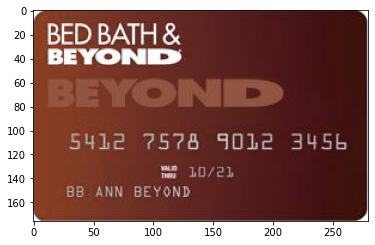

In [6]:
plt.imshow(imageA)  #plt.imshow(imageA, cmap=plt.cm.gray)

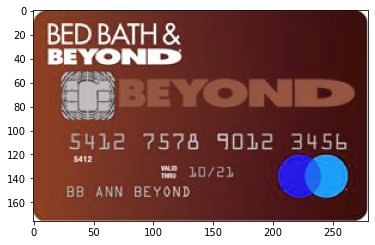

In [7]:
plt.imshow(imageB)

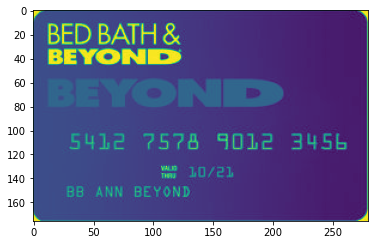

In [11]:
plt.imshow(grayA)

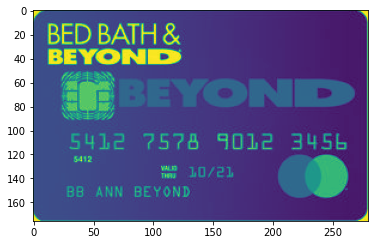

In [12]:
plt.imshow(grayB)

# Similarity score

In [13]:
(score, diff) = structural_similarity(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.8097040366284152


# threshold the difference image, followed by finding contours to
   obtain the regions of the two input images that differ

In [15]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)

In [16]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

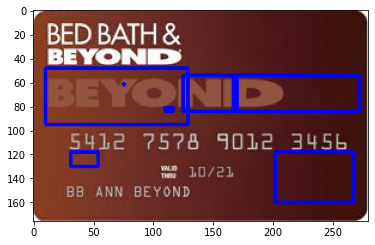

In [17]:
plt.imshow(imageA)

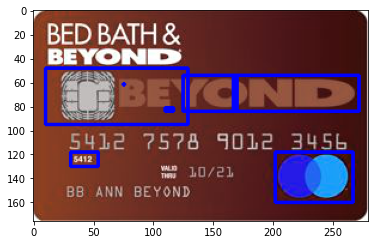

In [18]:
plt.imshow(imageB)

# show the output images as popup
cv2.imshow("Original", imageA)
cv2.imshow("Modified", imageB)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)